<a href="https://colab.research.google.com/github/illiyas-sha/Shopify-Winter-2022-Data-Science-Intern-Challenge/blob/main/Shopify_winter_Intern_Challenge_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shopify Winter Intern Challenge 2022


Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?


## Question 1:
## a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
df.shape

(5000, 7)

Checking for duplicated Values

In [5]:
df.duplicated().sum()

0

Checking for missing Values

In [6]:
df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

There is no missing values in the dataset


1. a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [7]:
shop = df.shop_id.unique()

In [8]:
len(shop)

100

100 unique shops are present in the data

Analysing order column

In [9]:
df.order_amount.mean()

3145.128

AOV is calcaluted by just taking mean of the order_amount on that month.

In [10]:
df.order_amount.min()

90

In [11]:
df.order_amount.max()

704000

In [12]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

From this, we can infer some details

* 50% of the orders are below $284

* 75% of the orders are below $390

* Maximum order amount is $704000

* Standard deviation refers to the dispersion of data.
Here, the std devation is very high (i.e) $41282 when compared with the mean. So the data is scattered. 

Based on this details, we can say that it has some outliers. We have to detect them and handle those outliers.

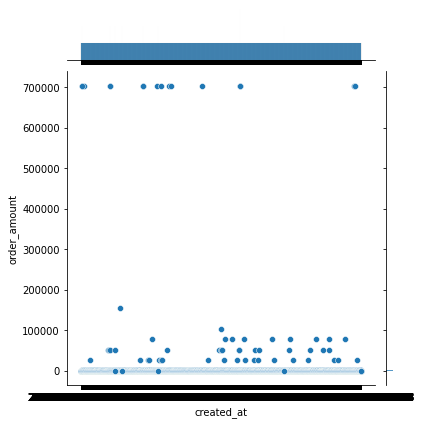

In [13]:
sns.jointplot(x ='created_at', y ='order_amount', data = df)

From this plot, we are evident that this contains some outliers.

Let us verify the ordered total items

In [14]:
df.total_items.describe()

count    5000.00000
mean        8.78720
std       116.32032
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max      2000.00000
Name: total_items, dtype: float64

In [15]:
df.total_items.unique()

array([   2,    1,    3, 2000,    4,    5,    6,    8])

In [16]:
# selecting rows that have more than 8 items per order
rslt_df = df[df['total_items'] > 8] 

In [17]:
rslt_df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


Now we can see that number of order items are not same for every order. There is a imbalance in the order items. Some records have bulk orders. 

So calculating AOV by also considering the bulk orders will not give correct results. 

Let us also check the order_amount for any fishy records.

In [18]:
df.order_amount.unique()

array([   224,     90,    144,    156,    138,    149,    292,    266,
          146,    322,    111,    447, 704000,    176,    164,    258,
          408,    486,    704,    256,    495,    177,    145,    112,
          178,    310,    294,    465,    244,    316,    459,    148,
          352,    624,    284,    195,    652,    346,    438,    296,
          399,    276,    531,    692,    181,    561,    560,    187,
          260,    160,    480,    390,    184,    122,    130,    116,
          142,    127,    354,    132,    254,    584,    328,    234,
          118,    513,    193,    180,    780,    612,    532,    320,
          201,    414,    129,    136,    165,    262,    590,    374,
          153,    492,    280,    188,    312,    544,    765,    426,
          441,    290,    640,    222,    435,    173,    306,    330,
        25725,    228,    272,    489,    464,    468,    351,    147,
          342,    387,    648,    488,    362,    516,    326,    338,
      

In [19]:
#Records having order_amount more than $2000
amount_df = df[df['order_amount'] > 2000] 

In [20]:
amount_df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
...,...,...,...,...,...,...,...
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4715,4716,78,818,77175,3,debit,2017-03-05 5:10:44
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


After glancing all these records, some of the sneakers are sold for nearly $25000/per item. So there may be error in the data entry. 



* All these high prize sneakers are sold out from the same shop. (i.e) shop_id - 78

* All the bulk orders are from the same shop (i.e) shop_id - 42

In [21]:
shop_df = df[df['shop_id'] == 78] 

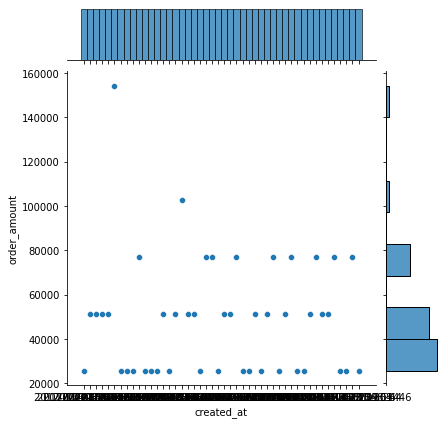

In [22]:
ax=sns.jointplot(x ='created_at', y ='order_amount', data = shop_df)


Shop id - 78 . record should not be considered for the AOV calculation. Because, they sold for $25725/sneaker which is a very high value compared to the other shops rate. 
So, if we consider them for AOV, then it would give misleading results.

In [23]:
shop_df_42 = df[(df['shop_id']== 42) ]
#&  (df['total_items'] >=8)

In [24]:
shop_df_42

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
834,835,42,792,352,1,cash,2017-03-25 21:31:25
835,836,42,819,704,2,cash,2017-03-09 14:15:15
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45
979,980,42,744,352,1,debit,2017-03-12 13:09:04


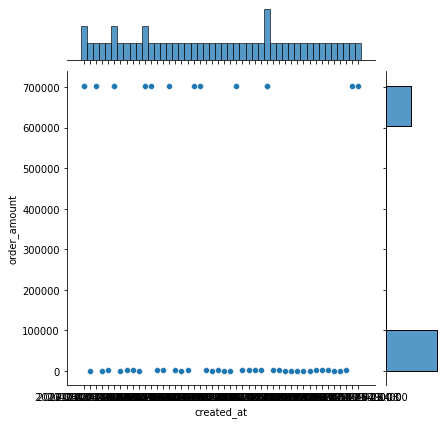

In [25]:
a = sns.jointplot(x='created_at',y='order_amount',data = shop_df_42)

shopid 42's sales data shows that, they have taken orders for low cost and also bulk orders. So, we only need to omit the bulk orders and not the ordinary orders.

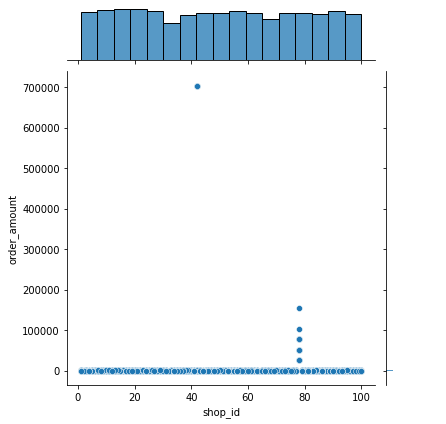

In [26]:
a = sns.jointplot(x='shop_id',y='order_amount',data = df)

This plot shows the shopid 42 and 78 high order amount

## Question 1:  
## b) What metric would you report for this dataset?
## c) What is its value?




We can come to some solution for this problem by two methods.

1) Calculating AOV for each distinct shops on that month
 
This can be done without removing any outliers. 
  
  Particular shops(shopid 42 & 78) which has high revenue will obviously have high AOV. Other shops will not be affected by these outlier values.


2) Calculating Median Order Value

1) calculating AOV for Each shop

In [27]:
sales_per_shop_df = df.groupby('shop_id')['order_amount'].sum().reset_index(name='total_sales_each_shop')

In [28]:
sales_per_shop_df

,shop_id,total_sales_each_shop
0,1,13588
1,2,9588
2,3,14652
3,4,13184
4,5,13064
...,...,...
95,96,16830
96,97,15552
97,98,14231
98,99,18330


In [29]:
avg = df.groupby('shop_id')['order_amount'].mean().reset_index(name='AOV_for_each_shop')
avg

,shop_id,AOV_for_each_shop
0,1,308.818182
1,2,174.327273
2,3,305.250000
3,4,258.509804
4,5,290.311111
...,...,...
95,96,330.000000
96,97,324.000000
97,98,245.362069
98,99,339.444444


In [30]:
median_shop=df.groupby('shop_id')['order_amount'].median().reset_index(name='median_order_value_for_each_shop')
median_shop

,shop_id,median_order_value_for_each_shop
0,1,316
1,2,188
2,3,296
3,4,256
4,5,284
...,...,...
95,96,306
96,97,324
97,98,266
98,99,390


In [31]:
temp_data = [sales_per_shop_df,avg['AOV_for_each_shop'],median_shop['median_order_value_for_each_shop']]
sales_per_shop_df = pd.concat(temp_data, axis=1)
sales_per_shop_df 

,shop_id,total_sales_each_shop,AOV_for_each_shop,median_order_value_for_each_shop
0,1,13588,308.818182,316
1,2,9588,174.327273,188
2,3,14652,305.250000,296
3,4,13184,258.509804,256
4,5,13064,290.311111,284
...,...,...,...,...
95,96,16830,330.000000,306
96,97,15552,324.000000,324
97,98,14231,245.362069,266
98,99,18330,339.444444,390


2) Calculating Median order value

In [32]:
df.order_amount.median()

284.0

Median order amount for all the shops' sneaker sales is $284

In [33]:
total_sales_df=df.groupby('total_items')['order_amount'].sum().rename_axis('total_items').reset_index(name='total_sales')
total_sales_df

,total_items,total_sales
0,1,763777
1,2,1374394
2,3,1120803
3,4,277672
4,5,58470
5,6,161460
6,8,1064
7,2000,11968000


In [34]:
total_items_count = df.total_items.value_counts().rename_axis('total_items').reset_index(name='count')
total_items_count1 = total_items_count.sort_values(['total_items', 'count'], ascending=[True, False])
total_items_count1

,total_items,count
1,1,1830
0,2,1832
2,3,941
3,4,293
4,5,77
6,6,9
7,8,1
5,2000,17


In [35]:
data = [total_sales_df['total_items'],total_sales_df['total_sales']]
result_df = pd.concat(data, axis=1)
#result_df = result_df.sort_values(['total_items','count'], ascending=[True, False])
result_df

,total_items,total_sales
0,1,763777
1,2,1374394
2,3,1120803
3,4,277672
4,5,58470
5,6,161460
6,8,1064
7,2000,11968000


In [36]:
count= (1830,1832,941,293,77,9,1,17)
result_df['count'] = count

In [37]:
result_df

,total_items,total_sales,count
0,1,763777,1830
1,2,1374394,1832
2,3,1120803,941
3,4,277672,293
4,5,58470,77
5,6,161460,9
6,8,1064,1
7,2000,11968000,17


In [38]:
median=df.groupby('total_items')['order_amount'].median().reset_index(name='median_order_value')
median

,total_items,median_order_value
0,1,153
1,2,306
2,3,459
3,4,592
4,5,765
5,6,948
6,8,1064
7,2000,704000


In [39]:
median_data = [result_df,median['median_order_value']]
result_df = pd.concat(median_data, axis=1)
result_df

,total_items,total_sales,count,median_order_value
0,1,763777,1830,153
1,2,1374394,1832,306
2,3,1120803,941,459
3,4,277672,293,592
4,5,58470,77,765
5,6,161460,9,948
6,8,1064,1,1064
7,2000,11968000,17,704000


In [41]:
sales_per_shop_df.to_csv('AOV_For_Each_Shop.csv',index=False)

In [42]:
result_df.to_csv('Median_Order_Value_for_number_of_items_per_order.csv',index=False)